# Guia PS y multicapa
## Consigna parte 1
Realizar la compuerta lógica AND con un perceptron simple programado sin librerías. Ir ploteando la recta obtenida para cada paso.
## Consigna parte 2
Realizar la compuerta lógica XOR con una red multicapa. Se pueden usar librerías.
http://scikit-learn.org/stable/modules/neural_networks_supervised.html
## Solución

# Preparativos desafio

In [19]:
import wfdb
import numpy as np
import os
import matplotlib.pyplot as plot
from IPython.display import display


# Importo los datos del dataset 100 de mitdb
signals2, fields2=wfdb.srdsamp('100', channels=[0,1], sampfrom=0, sampto=100000, pbdir = 'mitdb') 
# Importo las anotaciones del mismo dataset
annotation = wfdb.rdann('100', 'atr', sampfrom = 0, sampto = 100000, pbdir = 'mitdb')
#Me quedo con los picos de cada ECG que es donde están las anotaciones
picos=annotation.annsamp

#anotaciones de los datos
anotaciones = annotation.anntype

#Transpongo las señales leídas para poder operar mas comodamente
signals=np.matrix.transpose(signals2)
picos[-1]=0 #descarto el último pico por si el latido está interrumpido
tam=125 #Tamaño del latido que tomo a la izquierda y a la derecha de la anotación
cantLatidos=sum(picos>tam) #Cuento la cantidad de anotaciones en el segemento a analizar
latidos=np.zeros([cantLatidos,2*tam]) #Reservo espacio para la matriz de datos cantLatidos x 2*tam
latidosNorm=np.zeros([2*tam,cantLatidos])#Reservo espacio para la matriz de datos normalizados
numLat=0 #Inicializo en cero para procesar cada uno de los picos
for i in picos:
    if i>tam: # i>tam por si el primer latido está trunco
        latidos[numLat]=signals[0][i-tam:i+tam] #tomo tam muestras a la izquerda y a la derecha de la anotación
        numLat+=1 #incremento el número de latidos

#El set de latidos está en latidos y el largo de cada latido es de tam muestras

latidos=np.matrix.transpose(latidos) #vuelvo a acondicionar los latidos para seguir operando cómodamente


In [20]:
### Normalización

# A continuación calculo la media y la varianza de cada elemento del vector de datos para poder normalizar cada dato
medias=np.zeros(2*tam)
desv=np.zeros(2*tam)
for i in range(0,2*tam):
    medias[i]=np.mean(latidos[i,:])
    desv[i]=np.std(latidos[i,:])
    
# Normalizo cada latido
for idx in range(0,2*tam):
    latidosNorm[idx]=latidos[idx]-np.ones(cantLatidos)*medias[idx]
    latidosNorm[idx]=latidosNorm[idx]/desv[idx]


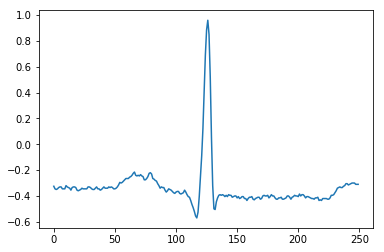

In [32]:
latidos=np.matrix.transpose(latidos) #vuelvo a acondicionar los latidos para seguir operando cómodamente

plot.plot(latidos[1])
plot.show()

In [33]:
print(anotaciones[4])

N
